# Classical ciphers challenge

The task is to crack the four ciphertexts. Each one is written in plain text English. The ciphertexts are in [cracking_challenges.md](./cracking_challenges.md)

In [1]:
import random
import copy
import re
import math
import string
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import common as cm

## Challenge 1 - Ceasar's cipher
--------

In [2]:
ciphertext1 = "nrstymjwjytgjujwkjhynrmjwjytgjwjfqqfidlflf"

In [3]:
englishAlphabet = list(string.ascii_lowercase)

In [4]:
bookEnglish = open("./statics/PictureOfDorianGray.txt", "r", encoding='utf8')
counter = 0 
sampleNaturalLanguage = ""

for line in bookEnglish:
    sampleNaturalLanguage += cm.lclear(line.strip())
    counter += 1
    if counter > 5000: 
        break

In [5]:
frequencyTableNaturalLanguage = cm.getFrequencyTable(sampleNaturalLanguage, englishAlphabet)
frequencyTableChipher = cm.getFrequencyTable(ciphertext1, englishAlphabet)


cipherTextFrequenciesSorted = list(frequencyTableChipher.items())
cipherTextFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)
naturalLanguageFrequenciesSorted = list(frequencyTableNaturalLanguage.items())
naturalLanguageFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)

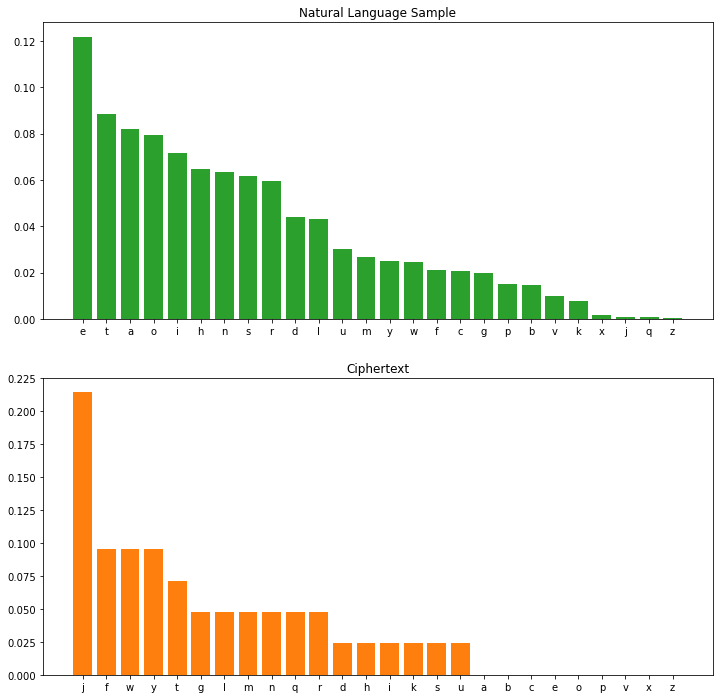

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

ax1.bar(
    list(map(lambda x: x[0] ,naturalLanguageFrequenciesSorted)),
    list(map(lambda x: x[1] ,naturalLanguageFrequenciesSorted)),
    color="tab:green"
)
ax1.set(title="Natural Language Sample")
ax2.bar(
    list(map(lambda x: x[0] ,cipherTextFrequenciesSorted)),
    list(map(lambda x: x[1] ,cipherTextFrequenciesSorted)),
    color="tab:orange"
)
ax2.set(title="Ciphertext")
plt.show()

Using the diagram above we can make assumtions of the most probable shift by looking at frequencies of characters

**Assumption**: shift = 5

In [7]:
possibleDecryption = {}
for i in range(len(cipherTextFrequenciesSorted)):
    possibleDecryption[englishAlphabet[i]] = englishAlphabet[(i - 5) % 26]
possibleDecryption[" "] = " "
    
print(possibleDecryption)
print(naturalLanguageFrequenciesSorted)

{'a': 'v', 'b': 'w', 'c': 'x', 'd': 'y', 'e': 'z', 'f': 'a', 'g': 'b', 'h': 'c', 'i': 'd', 'j': 'e', 'k': 'f', 'l': 'g', 'm': 'h', 'n': 'i', 'o': 'j', 'p': 'k', 'q': 'l', 'r': 'm', 's': 'n', 't': 'o', 'u': 'p', 'v': 'q', 'w': 'r', 'x': 's', 'y': 't', 'z': 'u', ' ': ' '}
[('e', 0.12191759136797921), ('t', 0.08848536222929189), ('a', 0.08207670978251434), ('o', 0.07932941494875631), ('i', 0.07170541646027911), ('h', 0.06466866500875763), ('n', 0.06349417093484622), ('s', 0.061727323328005554), ('r', 0.05953663655536207), ('d', 0.043859693916631345), ('l', 0.04322648841591389), ('u', 0.030286627618994123), ('m', 0.026880594804650996), ('y', 0.02517502514949267), ('w', 0.024643949568245765), ('f', 0.02125834273779675), ('c', 0.020553646293449898), ('g', 0.01996129276052066), ('p', 0.014951820210489764), ('b', 0.014609684980263393), ('v', 0.009860643724882424), ('k', 0.007838471319365365), ('x', 0.001562587767899545), ('j', 0.0009906602188644175), ('q', 0.0009702342349703057), ('z', 0.00042

In [8]:
decryptionAttempt = ""
for ch in ciphertext1:
    decryptionAttempt= decryptionAttempt + possibleDecryption[ch]
    
print(f"Cipher text : {ciphertext1}")
print(f"Decrypted message : {decryptionAttempt}\n")

Cipher text : nrstymjwjytgjujwkjhynrmjwjytgjwjfqqfidlflf
Decrypted message : imnotheretobeperfectimheretoberealladygaga



--------

## Challenge 2 - substitution cipher
--------


In [9]:
ciphertext2 = "bljjubbcbzteqczfdqfcdlvucbzteqfefdcecbeyujtlvfwuetjtzeczlueyfejtlzebsczbetzjylvjycdd"

#### Kgrams analysis:

Breaking a substitution cipher using k-gram analysis involves studying the patterns of groups of characters in the encoded message. Instead of looking at individual letters, we involve analyzing the frequency distribution of k-grams (sequences of k consecutive characters) in the ciphertext. 
By comparing the frequencies of these sequences in the encoded message to what we would expect in a normal text, we can make educated guesses about the substitutions made by the cipher. This analysis helps us uncover the most likely replacements for each sequence and gradually decipher the entire message.

*For measuring the quality of a decrypted text, we will use logarithmic text fitness (measure of the suitability or relevance of a piece of text based on the occurrence of specific patterns or sequences within it) It involves assigning a logarithmic score (of frequency of some k-gram) to these patterns to quantify their significance in evaluating the overall fitness or quality of the text.*

In [10]:
naturalLanguageAnalysis = cm.KGramAnalysis(textToAnalize=sampleNaturalLanguage, k=4)
fitnessTable, floorFitness = naturalLanguageAnalysis.calculateLogarithmicFitnessTable()

In [11]:
print(floorFitness)

-7.291870352977305


In [12]:
naturalLanguageAnalysis.fitnessMeasure('A mad dog is nothing more but a wicked creature.', fitnessTable, floorFitness)

-155.32905885823183

In [13]:
naturalLanguageAnalysis.fitnessMeasure(ciphertext2, fitnessTable, floorFitness)

-588.1643773364416

In [14]:
def encryptMessage(message: str, publicKey: list[int], alphabet: list[str]) -> str:
    message_lowercase = message.lower()
    ciphertext = ""

    for i in message_lowercase:
        if(i == " "):
            ciphertext = ciphertext + " "
        elif (i not in alphabet):
            continue
        else:
            nextChar = alphabet[publicKey[alphabet.index(i)]]
            ciphertext = ciphertext + nextChar

    return ciphertext

def decryptMessage(ciphertext: str, privateKey: list[int], alphabet: list[str]) -> str:
    return encryptMessage(ciphertext, privateKey, alphabet)

**We crack the substitution cipher by utilizing hill climbing:**
an iterative optimization technique that starts with an initial solution and incrementally improves it by iteratively adjusting a single element to reach a better solution in terms of the given objective function.
---------

In [15]:
def crackSubstitutionCipher(cipher: str, kGramTools: cm.KGramAnalysis, alphabet: list[str], iterations: int = 100):
    fitnessTable, floorFitness = kGramTools.calculateLogarithmicFitnessTable()
    ciphertext = cm.lclear(cipher)
    maxkey = list(range(0, len(alphabet)))
    maxscore = -99e9
    parentScore,parentKey = maxscore, maxkey
    
    for i in range(1, iterations):
        random.shuffle(parentKey)
        possiblePlaintext = decryptMessage(ciphertext, parentKey, alphabet)
        parentScore = kGramTools.fitnessMeasure(possiblePlaintext, fitnessTable, floorFitness)
        
        count = 0
        while count < 1000:
            a = random.randint(0,25)
            b = random.randint(0,25)
            childKey = parentKey[:]
            childKey[a],childKey[b] = childKey[b],childKey[a]
            candidateDecryption = decryptMessage(ciphertext, childKey, alphabet)
            childScore = kGramTools.fitnessMeasure(candidateDecryption, fitnessTable, floorFitness)
            if childScore > parentScore:
                parentScore = childScore
                parentKey = childKey[:]
                count = 0
            count += 1
        
        if parentScore > maxscore:
            maxscore,maxkey = parentScore,parentKey[:]
            print('\nbest score so far:',maxscore,'on iteration',i)
            ss = decryptMessage(ciphertext, maxkey, englishAlphabet)
            print('    best key: '+''.join(str(maxkey)))
            print('    plaintext: '+ss)
    
    return maxkey

In [16]:
decryptionKey = crackSubstitutionCipher(ciphertext2, naturalLanguageAnalysis, englishAlphabet)


best score so far: -395.62290368753384 on iteration 1
    best key: [16, 13, 8, 11, 4, 7, 1, 23, 2, 0, 6, 14, 9, 10, 21, 25, 22, 15, 3, 17, 12, 5, 20, 24, 18, 19]
    plaintext: noaamnnintrewithlwhilofmintrewhehlieinesmarofhumerarteitomeshearotenditnertasofasill

best score so far: -347.62564780904216 on iteration 6
    best key: [22, 18, 8, 11, 19, 0, 9, 1, 3, 2, 23, 20, 21, 16, 10, 24, 12, 25, 5, 14, 4, 17, 6, 15, 7, 13]
    plaintext: successisnotminalmailureisnotmatalitisthecouragetocontinuethatcountsfinstonchurchill


In [17]:
decryptMessage(ciphertext2, decryptionKey, englishAlphabet)

'successisnotminalmailureisnotmatalitisthecouragetocontinuethatcountsfinstonchurchill'

*Hill climbing might not guarantie 100% accuracy of the decryption (due to small ciphertext size). But we now we can clearly see the words.*

**Result:** "Success is not final, failure is not fatal. It's the courage to continue that counts. - Winston Churchill"

--------

## Challenge 3 - Vigenere cipher
--------
1) Firstly we will use index of coincidence for each 2nd, 3rd,..., k-th characters in the ciphertext to find out the most probable keyword length (The index of coincidence is a measure used in cryptography to assess the likelihood of two randomly selected letters in a ciphertext being the same, indicating the presence of a substitution cipher)
2) Next we will treat each subsequences of k-th characters as different Ceasar's ciphertexts and use frequency analysis to decrypt them:

In [18]:
ciphertext3 = "sakkgpsaizumivvzteuhioztpvbzxezvtrmgibniazcfxxunkfbnqriyqbqdegmjpyfrixzaqrlkpweelkpweelcmseactgsyntzqdhljkmrkvnzqdavbnfhinjoxixlbufhmasrqavaitpfirtkyoxvwtelmxmgtuqnvhqirtpktahnavqcmntoztiemyfirpwjqsealidytgwmdatugyberqqtscshvzxewfpugrwrfvxovvvmfhisiyoirnbozgabzrpojfmidexzmyeakrauzehngkpweelyfuqotkputbvgzarpqkztfbwqangegvfarnteeiwvvztezvtrmgiyqhdavlbnqbsbscmsjvtrqdavbnyywgmxuoyfkupewnvjoitumxearqbnqtiqleneeenkxtefcjperhzmqtshvxmviybnqsipzkfslvljqnavbnunlrjudrsjmjfhiowuwarqjksargwyfuhlqziixunkdviabjqdmpizuor"

In [19]:
from collections import Counter
import string

def compute_ic(text, alphabet):
    text = cm.lclear(text)
    counts = Counter(c for c in text if c in alphabet)
    total = sum(counts.values())
    ic = sum(n * (n - 1) for n in counts.values()) / (total * (total - 1))
    ic *= 26
    return ic

In [20]:
compute_ic(ciphertext3, englishAlphabet)

1.0513334100763592

In [21]:
possibleKeyLengths = []

for keyLength in range(2, 21):
    indexes = []
    for shift in range(0, keyLength):
        lengthOfSubstring = len(ciphertext3) // keyLength
        charsToAnalyse = "".join([ciphertext3[keyLength*i + shift] for i in range(0, lengthOfSubstring)])
        indexOfCoincidence = compute_ic(charsToAnalyse, englishAlphabet)
        indexes.append(indexOfCoincidence)
    averageIndex = sum(indexes)/len(indexes)
    possibleKeyLengths.append((keyLength, averageIndex))

possibleKeyLengths.sort(key = lambda x: x[1], reverse=True)
print(possibleKeyLengths)

[(12, 1.6835075493612077), (6, 1.6677871148459384), (18, 1.6164021164021165), (3, 1.2766214177978885), (9, 1.2587301587301587), (15, 1.229708853238265), (14, 1.2056689342403628), (2, 1.1625135093407442), (19, 1.1578947368421055), (4, 1.1568553930758658), (17, 1.1391480730223122), (16, 1.1252688172043013), (8, 1.118279569892473), (10, 1.1154509803921566), (20, 1.0963333333333336), (13, 1.0796221322537112), (11, 1.0322353974527887), (5, 1.015569792273345), (7, 1.0133724722765818)]


In [22]:
compute_ic(sampleNaturalLanguage, englishAlphabet)

1.6893451023928967

**Maximal index of coincidence was calculated for 6, 12, 18**, each of those is divisible by 6.

**Assumption: keyword length = 6**

-------

In [23]:
keyLength = 6
frequencyTables = []

for shift in range(0, keyLength):
    lengthOfSubstring = len(ciphertext3) // keyLength
    charsToAnalyse = "".join([ciphertext3[keyLength*i + shift] for i in range(0, lengthOfSubstring)])

    frequencyTableChipher = cm.getFrequencyTable(charsToAnalyse, englishAlphabet)
    cipherTextFrequenciesSorted = list(frequencyTableChipher.items())
    cipherTextFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)
    frequencyTables.append(cipherTextFrequenciesSorted)

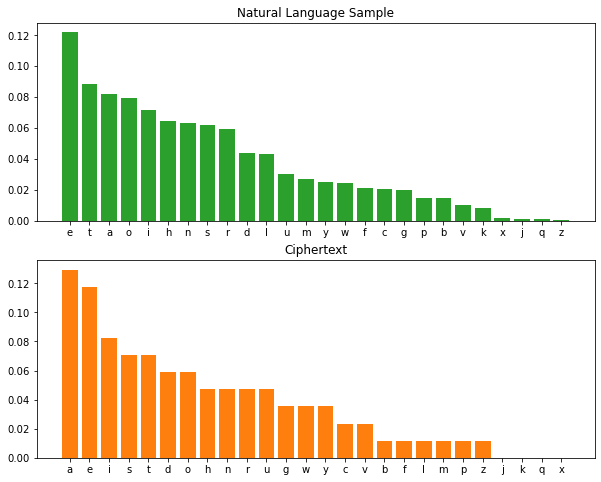

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

ax1.bar(
    list(map(lambda x: x[0] ,naturalLanguageFrequenciesSorted)),
    list(map(lambda x: x[1] ,naturalLanguageFrequenciesSorted)),
    color="tab:green"
)
ax1.set(title="Natural Language Sample")
ax2.bar(
    list(map(lambda x: x[0] ,frequencyTables[5])),
    list(map(lambda x: x[1] ,frequencyTables[5])),
    color="tab:orange"
)
ax2.set(title="Ciphertext")
plt.show()

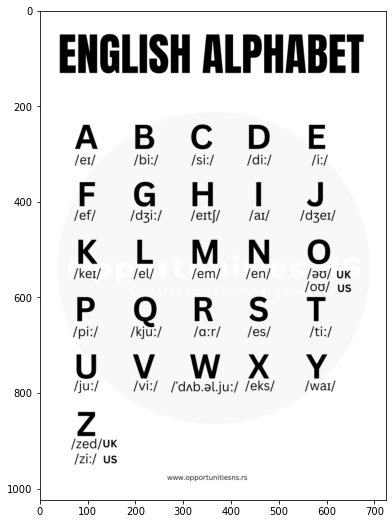

In [25]:
alphabetImage = np.asarray(Image.open("./statics/alphabet.png"))
plt.figure(figsize = (9,9))
plt.imshow(alphabetImage)
plt.show()

------
From frequency analysis of each subsequence of 0th,1st, 2nd...5th characters and looking for most possible shifts (these procedure was shown above only for one of such substrings + in ome cases one needs to use k-gram's analysis additionally).

**We make an assumtion that the key is:** (4, 9, 19, 6, 11, 0).
Further we will look at the text and try to find words, correct them and hence improve our decryption key. 

In [26]:
def decryptVigenere(cipher: str, key: list[int], alphabet: list[str]):
    ciphertext = cm.lclear(cipher)
    plaintext = ""
    for count, char in enumerate(ciphertext):
        position = alphabet.index(char)
        currentPositionInKey = count % len(key)
        newChar = alphabet[(position - key[currentPositionInKey]) % len(alphabet)]
        plaintext += newChar
    return plaintext

In [27]:
print(decryptVigenere(ciphertext3, [4, 9, 19, 6, 11, 0], englishAlphabet))

orrevporptjmemctieqypiotlmitmevmalbgesucpzywerjngwihfrepxvfdaxtdeybiproamiseewavseewavswbsarjnvsueatfddcqebrgmutfdwmihuheeqimitciouhirzlfarrpnefeiaenotmdntliotaiumecbfinkweiadehpfcieaiotevtsuingddfsarscsypxdgsaplnsqenhxnhcoyctmeswwovrsimpmormcguhejpsdineiiogwsgleofwtcsetqtstagihooedeneewavssuumfaeeupscaoangxeotbsdkpncvnpuaneaytismctievmalbgepxbsarcihfboszwbsfmalfdwmihnysxtrjouwroeesecddipltrtanhihftehsyceavuemtawjdeenyggftoycrbvepihfseggeushmsdfnwmihjnhiqosroatduhefdolanhqehanxdsuudcxtxitluesveridfdigptjon


"tjme" looks like "time", so lets change the corresponding shift in our decryption key:

In [28]:
print(decryptVigenere(ciphertext3, [4, 9, 19, 6, 12, 0], englishAlphabet))

orreuporptimemctheqypintlmitlevmalagesucozyweringwiherepxvedaxtddybiprnamisedwavsedwavswasarjnusueateddcqeargmutedwmihtheeqilitciothirzlearrpndfeiaemotmdnsliotahumecbeinkwehadehpecieaintevtstingddesarscrypxdgraplnspenhxngcoyctleswwoursimplormcgthejpscineiingwsgldofwtcretqtssagihonedenedwavsstumfaedupscanangxentbsdkoncvnptaneaysismcthevmalagepxbrarciheboszwasfmaledwmihmysxtriouwrodesecdcipltrsanhihetehsybeavueltawjddenyggetoycravepiheseggetshmsdenwmihinhiqorroatdthefdokanhqeganxdstudcxtwitluerveridedigption


"orreuporptime" looks like "onceuponatime"...

In [29]:
decryptVigenere(ciphertext3, [4, 13, 8, 6, 12, 0], englishAlphabet)

'onceuponatimeinthequaintlittlevillageofcozyspringstherelivedateddybearnamededwardedwardwasanunusualteddybeargiftedwiththeabilitytothinklearnandfeelemotionslikeahumanbeinghehadaspecialinterestincodesandcryptographyspendingcountlesshoursexploringthefascinatingworldofsecretmessagesonedayedwardstumbleduponanancientbookoncryptanalysisinthevillagelibrarythebookwasfilledwithmysteriouscodesandciphersandtheteddybearfeltasuddenurgetounravelthesecretshiddenwithinheborrowedthebookandbegantostudyitwithferventdedication'

In [30]:
print(f"Code word is : {''.join(englishAlphabet[i] for i in [4, 13, 8, 6, 12, 0])}")

Code word is : enigma


--------

## Challenge 4 - Playfair cipher
--------
Here we will use hill climbing with simulated annealing modification - a variant of hill climbing that allows for occasional "downhill" moves to avoid getting stuck in local optima and explore a wider solution space.

In [31]:
ciphertext4 = "feormfrqnvkcevislvshnwhfqeeafazcnotodfpknizphqsxetiqleioftaihpaiadovetqgiaetikaiwhxqztbhuscwbmaigfckovdhadqaganvagwehoctnadanvpcaivnansmdaovsefencwsnonmlweflyzcghxwbeafryrbrhmbwbovimfiafcftoafrhetdbxgmxhqsrniemagflrsflafhqodfltzczailwefhmgofiovncveztoihomrqefotzcttadhagwdzcfinvkcdoeaetiqfeguogrsaievoiorryhqrsniikeaovghmsfnomoiglvswhnokzafwcagryagfltzcisxqkovmosbghaiveowqefanvecvgfkomzgqecfzczcioctdkaftetocvsbxwetqbovimghevoiabipdxswioradahnniemkevkndrkniantaghevoirqrsudetifvgryagdafencowagzcfdmwymnimfgatfnictryhqmxfydbgafeormformginfahdvniklvkowlnkaigdvoollefdpkaicwlncrtircrhhrdenclwpkhevovotodfpkagwhinzcioleforhvkcdndovzsiamenvlwvkniafglfgwanoagdaetdbzvqawoaocofnvuucinmrzievmyadimghnafaxbmnetiqacydczevfvnanvetesagflrsgmhnhnctmggaqmwhgccoetignafaghmcvbvotfionepxrnfasvlvqeidmwvoadkddcuqveltfeevctmgwvwacdbuorhrrbfvinlzhflvbqfhobacmrglfghfnvefefflrsedtarntffaztadryhmiameveztoiimghsoagtofgawhkaizewuomifovimmefswbtoevoiapfeewsmfapwdfke"

In [33]:
#remove all non-lower case elements of the standard latin alphabet
def lclear(text):
    return re.sub(r'[^a-z]', '', text.lower()) # we use regular expressions

def Ngrams(text,n): #logarithmic fitness
    digs=dict()
    for i in range(len(text)-n):
        d=text[i:i+n]
        if d in digs.keys():
            digs[d]+=1
        else:
            digs[d]=1

    tot=sum([digs[x] for x in digs.keys()])
    for k in digs.keys():
        digs[k]/=tot*1.0
        digs[k]=math.log(digs[k],10)
    flo=math.log(0.01/tot,10) #base score
    return digs, list(reversed(sorted([[digs[v],v] for v in digs.keys()]))),flo

def Fitness(text,kgrams,k,f): #compute fitness of text with respect to kgrams dictionary
    score=0
    for i in range(len(text)-1):
        d=text[i:i+k]
        if d in kgrams.keys():
            score+=kgrams[d]
        else:
            score+=f
    return score

counter=0
longtxt=''
with open('statics/PictureOfDorianGray.txt', encoding='utf8') as f:
    for line in f:
        longtxt+=lclear(line.strip())
        counter+=1
n4,l4,f=Ngrams(longtxt.replace('j','i'),4) #in playfair j and i are the same

def fit(text):
    return Fitness(lclear(text),n4,4,f)
def indexOf(letter,matrix):
    for i in range (5):
        try:
            index = matrix[i].index(letter)
            return (i,index)
        except:
            continue
            
def create_matrix(key):
    key = key.upper()
    matrix = [[0 for i in range (5)] for j in range(5)]
    letters_added = []
    row = 0
    col = 0
    # add the key to the matrix
    for letter in key:
        if letter not in letters_added:
            matrix[row][col] = letter
            letters_added.append(letter)
        else:
            continue
        if (col==4):
            col = 0
            row += 1
        else:
            col += 1
    #Add the rest of the alphabet to the matrix
    # A=65 ... Z=90
    for letter in range(65,91):
        if letter==74: # I/J are in the same position
                continue
        if chr(letter) not in letters_added: # Do not add repeated letters
            letters_added.append(chr(letter))
            
    #print (len(letters_added), letters_added)
    index = 0
    for i in range(5):
        for j in range(5):
            matrix[i][j] = letters_added[index]
            index+=1
    return matrix

def separate_same_letters(message):
    index = 0
    while (index<len(message)):
        l1 = message[index]
        if index == len(message)-1:
            message = message + 'X'
            index += 2
            continue
        l2 = message[index+1]
        if l1==l2:
            message = message[:index+1] + "X" + message[index+1:]
        index +=2   
    return message

def playfairmat(key, message, encrypt=True):
    inc = 1
    if encrypt==False:
        inc = -1
    matrix = key
    message = message.upper()
    message = message.replace(' ','')    
    message = separate_same_letters(message)
    cipher_text=''
    for (l1, l2) in zip(message[0::2], message[1::2]):
        row1,col1 = indexOf(l1,matrix)
        row2,col2 = indexOf(l2,matrix)
        if row1==row2: #Rule 2, the letters are in the same row
            cipher_text += matrix[row1][(col1+inc)%5] + matrix[row2][(col2+inc)%5]
        elif col1==col2:# Rule 3, the letters are in the same column
            cipher_text += matrix[(row1+inc)%5][col1] + matrix[(row2+inc)%5][col2]
        else: #Rule 4, the letters are in a different row and column
            cipher_text += matrix[row1][col2] + matrix[row2][col1]
    return cipher_text
def swap(m1):
    m=copy.deepcopy(m1)
    x=random.randint(0,4)
    y=random.randint(0,4)
    u=random.randint(0,4)
    v=random.randint(0,4)
    a=m[x][y]
    b=m[u][v]
    m[u][v]=a
    m[x][y]=b
    return m
def modify_key(m):
    return swap(m)
def playcrack(ciph,key):
    temp  = 200
    step  = 2
    count = 10000
    parent = key
    maxscore=fit(playfairmat(parent,ciph,False))
    bestscore=maxscore
    bestkey = parent

    for tt in range(temp,0,-step):
        t=tt/10.0
        for _ in range(count,0,-1):
            child=modify_key(parent)
            c=playfairmat(child,ciph,False)
            p=playfairmat(parent,ciph,False)
            score=fit(c)
            df = score-maxscore
            if df > 0:
                parent = child
                maxscore=score
            else:
                prob = math.exp(df/t)
                r=random.random()
                if prob > r:
                    parent = child
                    maxscore=score
            if maxscore > bestscore:
                bestscore = maxscore
                bestkey = parent
                print(bestscore)
                print(bestkey)
                print(playfairmat(bestkey,ciph,False)[:150])
    return bestscore,bestkey
parent=create_matrix('ABCDEFGHIKLMNOPQRSTUVWXYZ'.lower())
cc = ciphertext4
b=-200000
bk=parent
while True:
    b,bk=playcrack(cc,bk)
    print(b)
    print(bk)
    print(playfairmat(bk,cc,False)[:150])

-6831.799437817204
[['A', 'F', 'C', 'D', 'E'], ['B', 'G', 'H', 'T', 'K'], ['L', 'M', 'N', 'O', 'P'], ['Q', 'R', 'S', 'I', 'U'], ['V', 'W', 'X', 'Y', 'Z']]
ADMIGWQULXHEAZSRBQNCMXGCUADEAEXEMNDTCAKEOSUKBSNSDKSUPAOTDGDQKNDQECLYDKRBQDDKUTDQXGVSYKKGIRFXGLDQFWEHLYCTECLVBFLXFBZFTNDHLCCELXNEDQXLCLRNCELYUCADHXXRMN
-6817.325494125173
[['A', 'F', 'C', 'D', 'L'], ['B', 'G', 'H', 'T', 'K'], ['E', 'M', 'N', 'O', 'P'], ['Q', 'R', 'S', 'I', 'U'], ['V', 'W', 'X', 'Y', 'Z']]
AMMIGWQUEXHLBQSRAZNCMXGCEBBVALXLMNDTCAKLOSUKBSNSOBSUAPOTDGDQKNDQLCEYOBRBQDOBUTDQXGVSYKKGIRFXGEDQFWLHEYCTLCEVBFEXFBVMTNDHECCLEXNLDQXECERNCLEYQNAMHXXRMN
-6810.125763424042
[['A', 'F', 'C', 'D', 'L'], ['B', 'G', 'H', 'T', 'K'], ['E', 'M', 'Y', 'O', 'P'], ['Q', 'R', 'S', 'I', 'U'], ['V', 'W', 'X', 'N', 'Z']]
AMMIGWQUXZHLBQSRAZYCXVGCEBBVALXLITDTCAKLIOUKBSYSOBSUAPOTDGDQKYDQLCENOBRBQDOBUTDQXGVSNKKGIRFXGEDQFWLHENCTLCEVBFXZFBVMTYDHVDCLXZYLDQZXDVRYCLENQYAMXDXRIT
-6776.948024310871
[['A', 'F', 'C', 'D', 'L'], ['B', 'G', 'H', 'T', 'K'], ['E', 'Q

KeyboardInterrupt: 

--------
This algorithm takes time (3-30 minutes depending on the coputer). Also it should be run multiple times, since it might still stuck in local optimum without reaching the coorect solution. Therefore it's better to implement this decryption attack in languages like C/C++, C#, Java, Go (for the sake of execution speed + mutithreading).

In [34]:
possibleKey1 = [['B', 'L', 'C', 'O', 'W'], ['G', 'D', 'I', 'E', 'F'], ['Q', 'K', 'T', 'N', 'P'], ['Y', 'U', 'Z', 'V', 'X'], ['S', 'M', 'H', 'A', 'R']]
possibleKey2 = [['I', 'D', 'G', 'E', 'F'], ['T', 'K', 'Q', 'N', 'P'], ['Z', 'U', 'Y', 'V', 'X'], ['H', 'M', 'S', 'A', 'R'], ['C', 'L', 'B', 'O', 'W']]

In [37]:
print(playfairmat(possibleKey1,ciphertext4,False))
print(fit(playfairmat(possibleKey1,ciphertext4,False)))
print(playfairmat(possibleKey2,ciphertext4,False))
print(fit(playfairmat(possibleKey2,ciphertext4,False)))

EIWARDSPENTLONGHOURMPORINGOVERTHEANCGENQTEXTSTRYINGTODECIPHERTHEMEANINGBEHINDTHECRYPTICSYMLOLSHEFELTANIMMENSESENSEOFACHIEVEMENTWHENEVERSEMANAGEITOBREAKABOIEBUTHISPROGRESXSWAMSLOWANDHEDREWINCREAMINGLYFRUSTRATEDASEDWARDWRESTLEDWITHTHEBOIEMSEBEDANTONOTICEACSANGEWITHINHIMSELFTHEDENTLELOVINGTEIDYBEARHEONCEWASXSTARTEDTOVANISSREPLACEDBYACREATUREOLSESXSEDWITHCRYPQANALYSISHENOCONGERENIOYEDPLAYINGWITHTHECHILDRENINCOZYSPRINGSANDHISONCESOFTFURBECAHEMATTEDANDUNKEMPTEVENHISONCESPARKLINDEYESXSEEMEITOCOSETHEGRLUSTERDESPITEHISXSTRUGXGLESEIWARDWASDETERMINEDTOUNLOBTQHEFGNACBODEGNQHELOOKWHICHWAMMAGITOBONQAINANANCGENQSECRETTHECODEWAMUNLIKEANYHEHADENBOUNTEREDBEFOREASEEMINGLUZNSOCVALCEPZYZLETSATCONSUMEDHISEVERYWAKINGTHOUGHTONEXEVENINGASEDWARDSATATHISDESKSCRIBLCINDFEVERISHLYONAPIECEOFPAPERAYOUNGDGRLNAMEDLILYKNOCKEIONHISDOXORLILYWAMASWEXETCURIOUSGIRCWHOSADBEFRIENIEIEDWARIGNHAPPIERTIMESXMSEHADNOTICEDHISABSENCEFROMTHEVILXLADEANDHADGROWNCONCERNEIFORSERFRGEND
-4676.6754082774705
EGWARDSPENTLONGHOUMRPORINGOVERTHEAN

------
**Above are shown 2 most successful decryption contenders.**
Though we see the words, but it's not 100% accurate. If we need correct, human-friendly text, we can pass it through some LLM, such as ChatGPT to beautify it.

**Corrrect Decryption:**
Edward spent long hours poring over the ancient texts, trying to decipher the meaning behind the cryptic symbols. He felt immense satisfaction whenever he managed to break a code, but his progress was slow, and he grew increasingly frustrated. He wrestled with the complex puzzles, hoping to notice a change within himself.

The gentle, loving Teddy bear he once was seemed to vanish, replaced by a creature obsessed with cryptanalysis. He no longer enjoyed playing with the children in cozy springs, and his once soft fur became matted and unkempt. Even his once sparkling eyes seemed to lose their luster.

Despite his struggles, Edward was determined to unlock the hidden code in the book, which he believed contained an ancient secret. The code was unlike anything he had encountered before, a seemingly unsolvable puzzle that consumed his every waking thought.

One evening, as Edward sat at his desk, scribbling feverishly on a piece of paper, a young girl named Lily knocked on his door. Lily was a curious girl who had been missing Edward's presence in the village and grew concerned for her friend.